In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time

In [3]:
df_consumption = pd.read_csv('electricity_consumption.csv', delimiter=';', decimal=',')

df_consumption = df_consumption[['Time', 'Consumption']]

df_consumption.info()

df_consumption.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         8760 non-null   object 
 1   Consumption  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


,Time,Consumption
8755,15.6.2022 19.00,0.20
8756,15.6.2022 20.00,1.24
8757,15.6.2022 21.00,0.23
8758,15.6.2022 22.00,0.48
8759,15.6.2022 23.00,3.48


In [4]:
# Function for time formating

def str2datetime(date_string_list, time_format):
    date_h = [0] * len(date_string_list)  

    for i in range (len(date_string_list)):
        date_h[i] = datetime.datetime.strptime(date_string_list[i], time_format)
    return date_h

In [5]:
df_prices = pd.read_csv('hourly_prices.csv', delimiter=';', decimal=',')

df_prices['DateTime'] = pd.to_datetime(df_prices['DateTime'])

df_prices.info()

df_prices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  8784 non-null   datetime64[ns]
 1   price     8784 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.4 KB


,DateTime,price
0,2021-06-16 00:00:00,6.91
1,2021-06-16 01:00:00,4.11
2,2021-06-16 02:00:00,5.00
3,2021-06-16 03:00:00,3.65
4,2021-06-16 04:00:00,3.68


In [6]:
date_h = str2datetime(df_consumption['Time'], '%d.%m.%Y %H.%M') # dateformat from origin datatype '%d.%m.%Y %H.%M' 16.06.2021 19.00'

df_consumption['DateTime'] = date_h

df_consumption = df_consumption[['DateTime', 'Consumption']]

df_consumption.head()

df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     8760 non-null   datetime64[ns]
 1   Consumption  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [7]:
# Example with unix epoch

import calendar

epoch_time_1 = (df_consumption['DateTime'][0] - datetime.datetime(1970, 1, 1)).total_seconds() # 1623801600.0 Method 1: assumes that time is in GMT time

epoch_time_2 = time.mktime(df_consumption['DateTime'][0].timetuple()) # 1623790800.0 Method 2: assumes that time is in local time 

epoch_time_3 = calendar.timegm(df_consumption['DateTime'][0].timetuple()) # Method 3 in GMT

print('Method 1', epoch_time_1)
print('Method 2', epoch_time_2)
print('Method 3', epoch_time_3)
print('Difference between methods 1 and 2 is ', (epoch_time_1 - epoch_time_2)/3600, 'h')
print('Difference between methods 1 and 3 is ', (epoch_time_1 - epoch_time_3)/3600, 'h')

Method 1 1623801600.0
Method 2 1623790800.0
Method 3 1623801600
Difference between methods 1 and 2 is  3.0 h
Difference between methods 1 and 3 is  0.0 h


In [8]:
# Merge two dataframes

df_electricity = pd.merge(df_prices, df_consumption, on='DateTime', how='inner') #left_on='lkey', right_on='rkey'

# inner_join 8737 rows
# outer_join 8808 rows
# right_join 8759 rows

# df_electricity

df_electricity['bill_eur'] = df_electricity['Consumption'] * df_electricity['price'] / 100

df_electricity[4200:4225]

df_electricity.tail()

,DateTime,price,Consumption,bill_eur
8732,2022-06-15 19:00:00,31.00,0.20,0.062000
8733,2022-06-15 20:00:00,27.17,1.24,0.336908
8734,2022-06-15 21:00:00,17.56,0.23,0.040388
8735,2022-06-15 22:00:00,12.39,0.48,0.059472
8736,2022-06-15 23:00:00,11.22,3.48,0.390456


In [9]:
total_consumption = sum(df_electricity['Consumption'])

print('Total consumption of electricity over the time period 16.06.2021 - 15.06.2022: ', round(total_consumption, 2), 'kWh')

Total consumption of electricity over the time period 16.06.2021 - 15.06.2022:  13226.43 kWh


In [10]:
avg_hourly_price = df_electricity['price'].mean() / 100

print('Average hourly price over the time period 16.06.2021 - 15.06.2022: ', round(avg_hourly_price, 2), '€/h' )

Average hourly price over the time period 16.06.2021 - 15.06.2022:  0.12 €/h


In [11]:
total_bill = sum(df_electricity['bill_eur'])

print('Total electricity bill over the time period 16.06.2021 - 15.06.2022: ', round(total_bill, 2), '€')

Total electricity bill over the time period 16.06.2021 - 15.06.2022:  1693.4 €


In [12]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

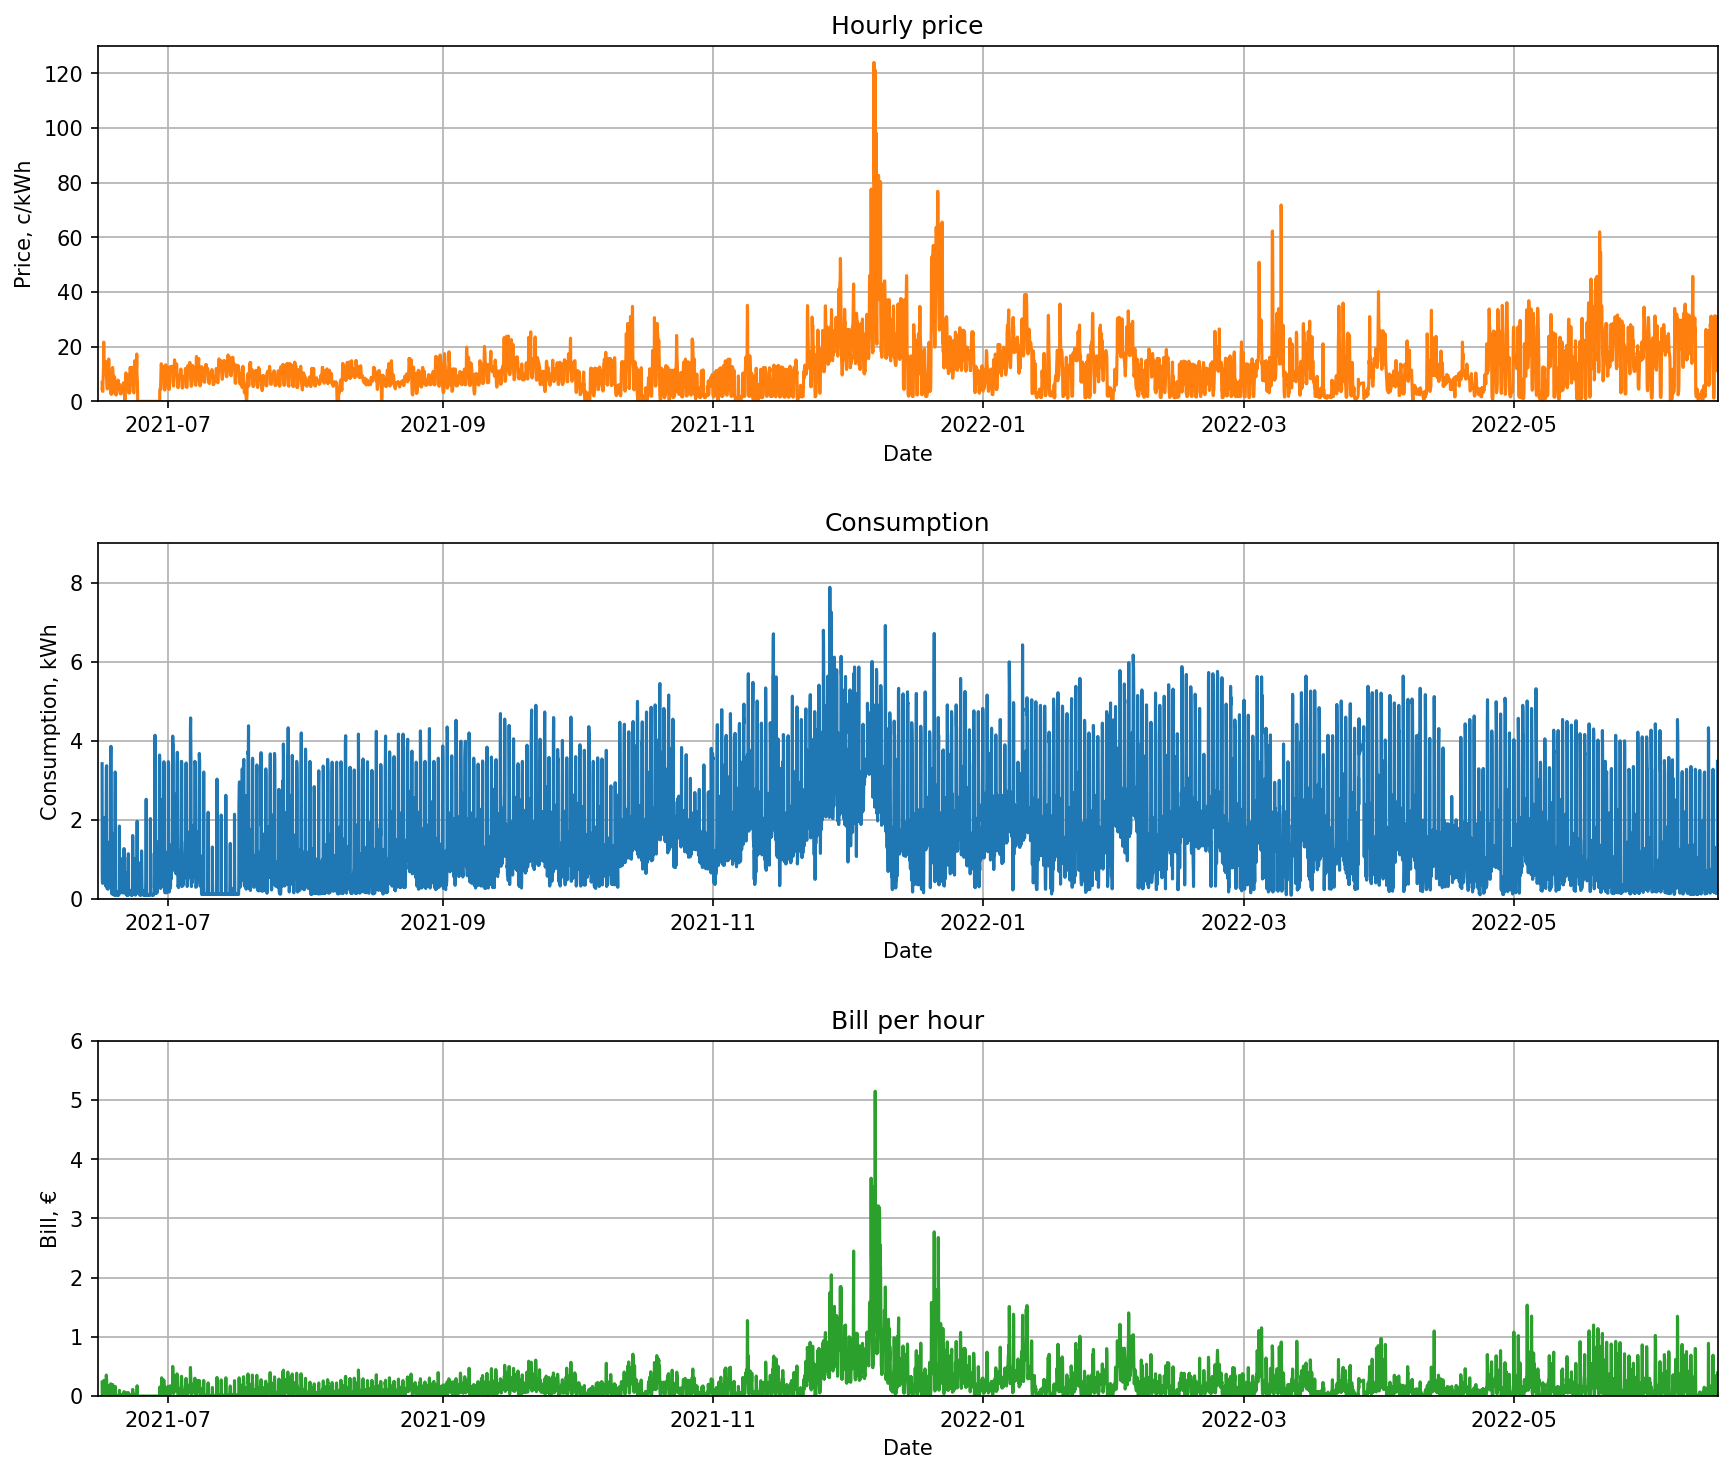

In [16]:
plt.figure(figsize=(18,10), dpi=150)
plt.subplots_adjust(left=0.3,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(3, 1, 1)
plt.plot(df_electricity['DateTime'], df_electricity['price'], 'tab:orange')
plt.title('Hourly price')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price, c/kWh')
plt.xlim([datetime.date(2021, 6, 15), datetime.date(2022, 6, 16)])
plt.ylim(0, 130)
plt.subplot(3, 1, 2)
plt.plot(df_electricity['DateTime'], df_electricity['Consumption'])
plt.title('Consumption')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Consumption, kWh')
plt.xlim([datetime.date(2021, 6, 15), datetime.date(2022,6, 16)])
plt.ylim(0, 9)
plt.subplot(3, 1, 3)
plt.plot(df_electricity['DateTime'], df_electricity['bill_eur'], 'tab:green')
plt.title('Bill per hour')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Bill, €')
plt.xlim([datetime.date(2021, 6, 15), datetime.date(2022,6, 16)])
plt.ylim(0,6)

plt.show()

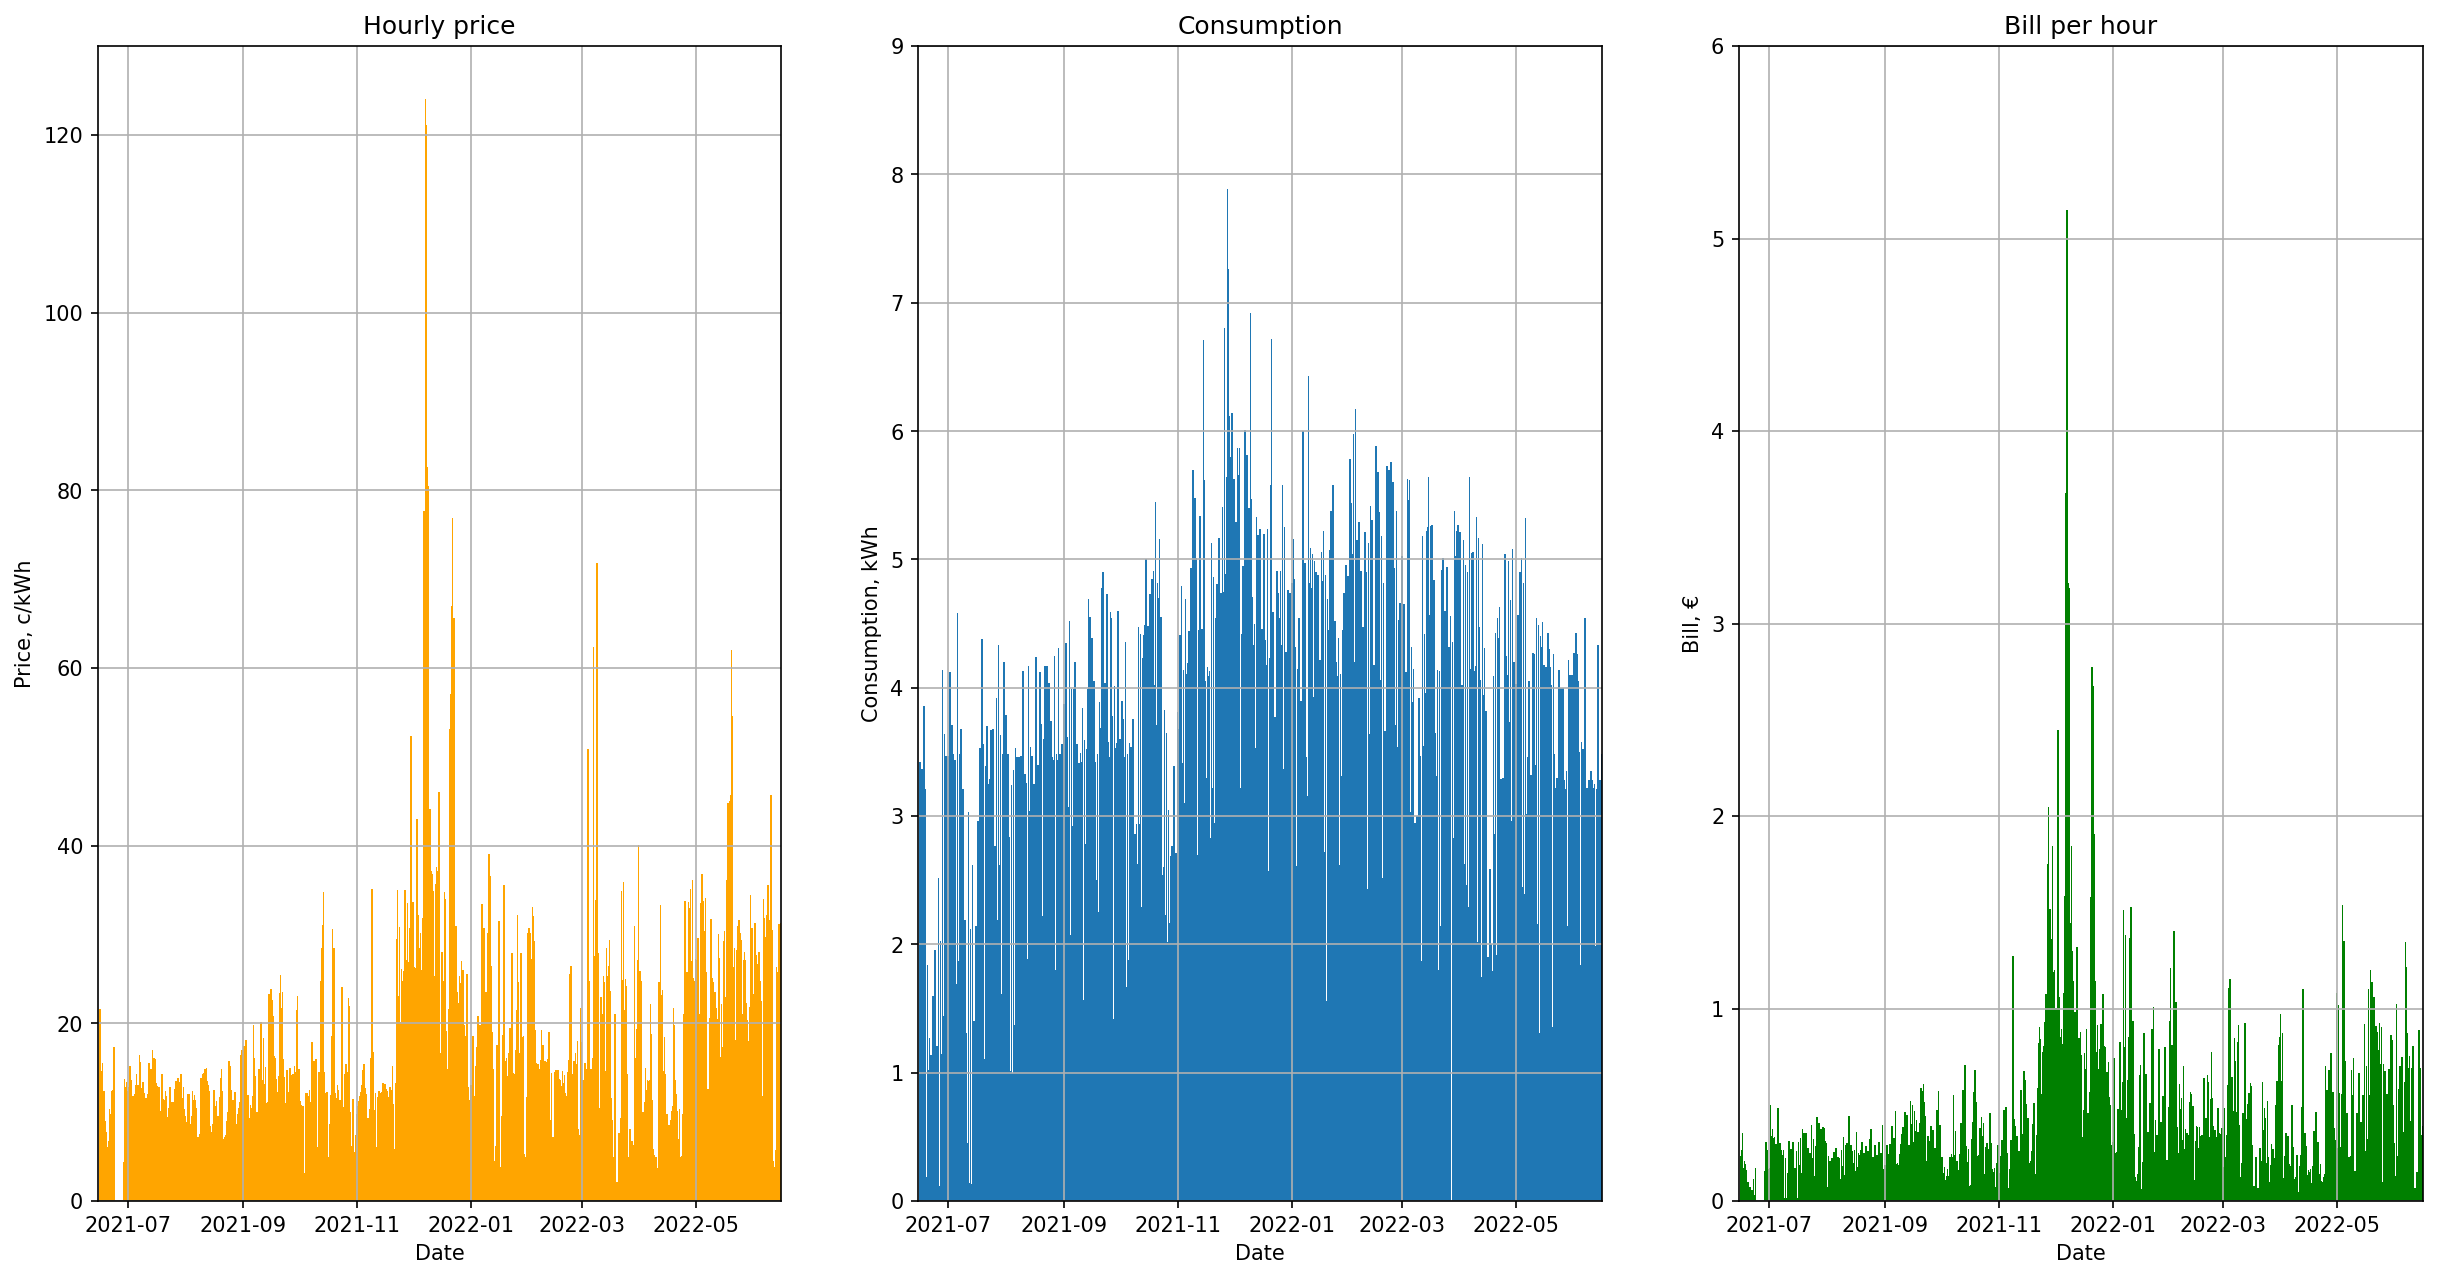

In [30]:

plt.figure(figsize=(20,10), dpi=150)
plt.subplot(1, 3, 1)
plt.bar(df_electricity['DateTime'], df_electricity['price'], color='orange')
plt.title('Hourly price')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price, c/kWh')
plt.xlim([datetime.date(2021, 6, 15), datetime.date(2022, 6, 16)])
plt.ylim(0, 130)
plt.subplot(1, 3, 2)
plt.bar(df_electricity['DateTime'], df_electricity['Consumption'])
plt.title('Consumption')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Consumption, kWh')
plt.xlim([datetime.date(2021, 6, 15), datetime.date(2022, 6, 16)])
plt.ylim(0, 9)
plt.subplot(1, 3, 3)
plt.bar(df_electricity['DateTime'], df_electricity['bill_eur'], color='green')
plt.title('Bill per hour')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Bill, €')
plt.xlim([datetime.date(2021, 6, 15), datetime.date(2022, 6, 16)])
plt.ylim(0,6)

plt.show()


In [57]:
df_price = df_electricity[df_electricity['DateTime'].between('2022-05-15','2022-05-16')]
df_price

,DateTime,price,Consumption,bill_eur
7969,2022-05-15 00:00:00,7.63,4.51,0.344113
7970,2022-05-15 01:00:00,11.74,1.93,0.226582
7971,2022-05-15 02:00:00,4.50,0.66,0.029700
7972,2022-05-15 03:00:00,3.10,0.64,0.019840
7973,2022-05-15 04:00:00,1.24,0.61,0.007564
7974,2022-05-15 05:00:00,0.88,0.60,0.005280
7975,2022-05-15 06:00:00,5.34,1.48,0.079032
7976,2022-05-15 07:00:00,0.92,0.56,0.005152
7977,2022-05-15 08:00:00,13.46,0.59,0.079414
7978,2022-05-15 09:00:00,13.80,0.81,0.111780


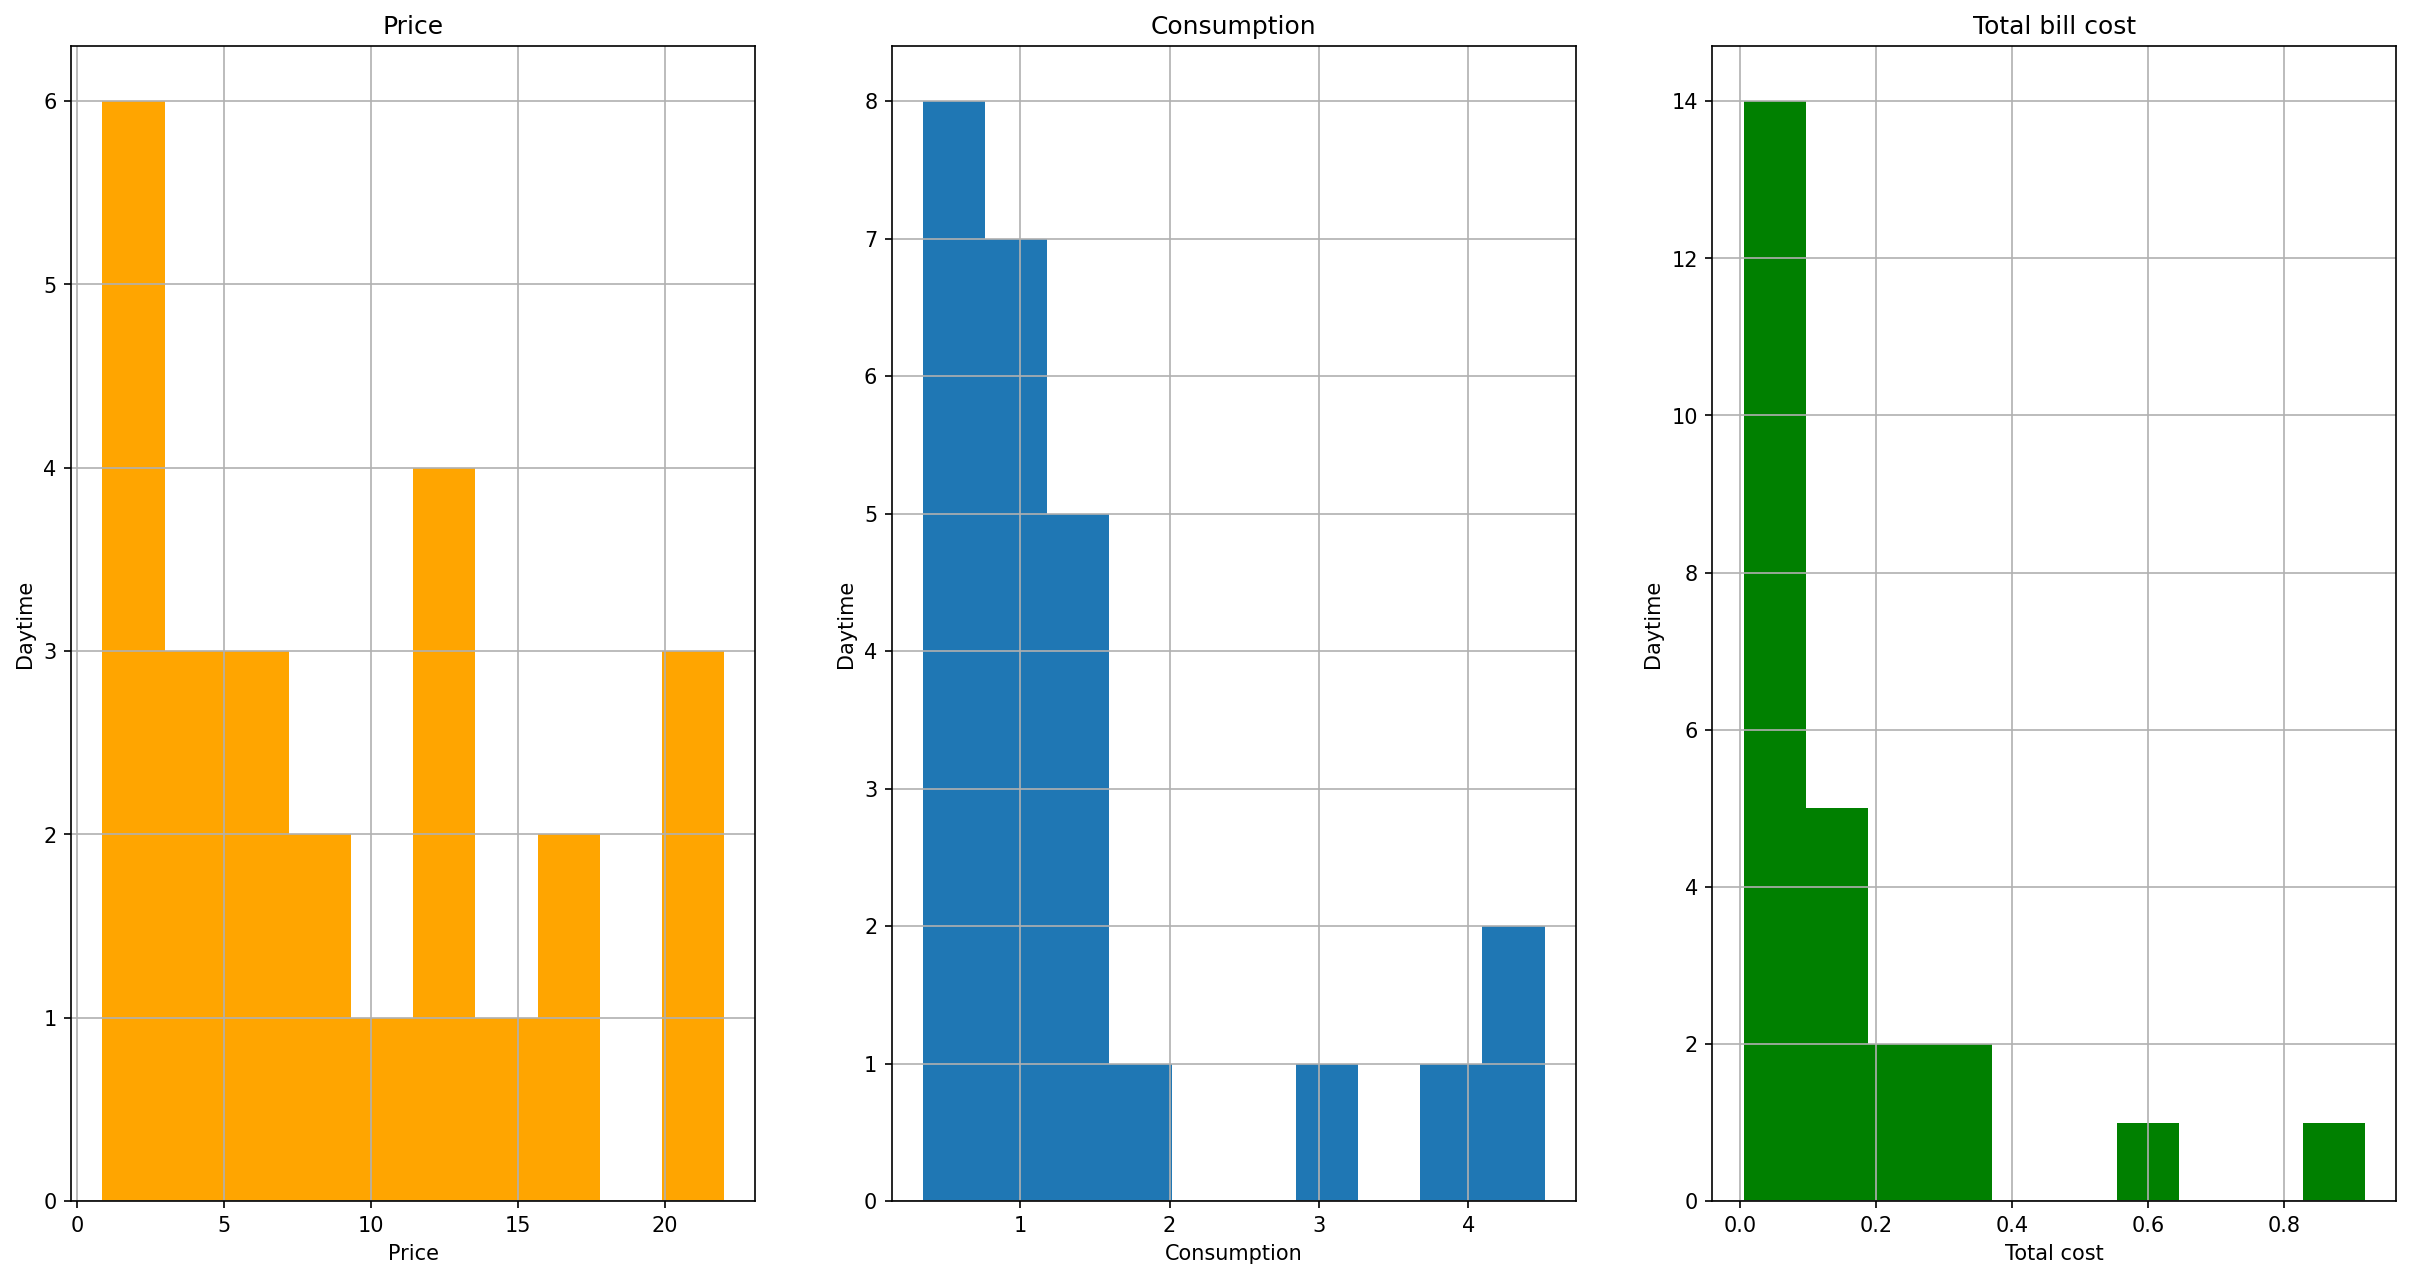

In [58]:
plt.figure(figsize=(20,10), dpi=150)
plt.subplot(1, 3, 1)
plt.title('Price')
plt.hist(df_price['price'], color='orange')
plt.xlabel('Price')
plt.ylabel('Daytime')
plt.grid(True)
plt.subplot(1, 3, 2)
plt.hist(df_price['Consumption'])
plt.title('Consumption')
plt.xlabel('Consumption')
plt.ylabel('Daytime')
plt.grid(True)
plt.subplot(1, 3, 3)
plt.hist(df_price['bill_eur'], color='green')
plt.title('Total bill cost')
plt.xlabel('Total cost')
plt.ylabel('Daytime')
plt.grid(True)
plt.show()

Notes:

    - Consumption data contains of 8760 rows and price data contains 8784 rows
    - Time format is different in price and consumption data
    - We must modify data frames in a way that the time format is same in both data files 
    - We should join two data files by matching time